# Book Recommendation System
## In the following project , our task is to create a book recommendation system to our users with the help of popularity based measure.
## For the following project, python modules numpy, pandas, matplotlib, seaborn and scikit learn has been used to perform the task.
## similar books according to the popularity and taste of the user have been recommended with the help of the concept of cosine similarity.
## first of all , exploratoty data analysis has been performed on the dataset and after that recommendation system has been built to display
## top 5 similar popular books related to the input book name provided by the user.

In [ ]:
#importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#reading csv files to dataframe
books=pd.read_csv("C:/Users/HP/Downloads/Books.csv")
ratings=pd.read_csv("C:/Users/HP/Downloads/Ratings.csv")
users=pd.read_csv("C:/Users/HP/Downloads/Users.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_9356\3527461124.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv("C:/Users/HP/Downloads/Books.csv")


# EXPLORATORY DATA ANALYSIS


In [7]:
#top 5 rows of books dataframe
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
#top 5 rows of ratings dataframe
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
#top 5 rows of users dataframe
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
books.info()
# all columns are object datatype with 8 columns and a small amount of missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [11]:
users.info()
# users dataframe has only age column with large number of missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
ratings.info()
#ratings dataframe has no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [6]:
#merging books and ratings dataframe and storing the resultant dataframe
#into new variable named book_recommend
book_recommend = pd.merge(books,ratings,on="ISBN")

In [14]:
book_recommend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031136 non-null  object
 1   Book-Title           1031136 non-null  object
 2   Book-Author          1031134 non-null  object
 3   Year-Of-Publication  1031136 non-null  object
 4   Publisher            1031134 non-null  object
 5   Image-URL-S          1031136 non-null  object
 6   Image-URL-M          1031136 non-null  object
 7   Image-URL-L          1031132 non-null  object
 8   User-ID              1031136 non-null  int64 
 9   Book-Rating          1031136 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 78.7+ MB


In [15]:
#top 5 rows of new dataframe book_recommend
book_recommend.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [16]:
#checking book_recommend dataframe for duplicate values
book_recommend.duplicated().sum()

0

In [17]:
book_recommend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031136 non-null  object
 1   Book-Title           1031136 non-null  object
 2   Book-Author          1031134 non-null  object
 3   Year-Of-Publication  1031136 non-null  object
 4   Publisher            1031134 non-null  object
 5   Image-URL-S          1031136 non-null  object
 6   Image-URL-M          1031136 non-null  object
 7   Image-URL-L          1031132 non-null  object
 8   User-ID              1031136 non-null  int64 
 9   Book-Rating          1031136 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 78.7+ MB


In [7]:
# changing datatype of book-title,book-author,year of publication and publisher in recommender
#dataframe
book_recommend['Book-Author']=book_recommend['Book-Author'].astype('category')
book_recommend['Book-Title']=book_recommend['Book-Title'].astype('category')
book_recommend['Year-Of-Publication']=book_recommend['Year-Of-Publication'].astype('category')
book_recommend['Publisher']=book_recommend['Publisher'].astype('category')


In [19]:
book_recommend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   ISBN                 1031136 non-null  object  
 1   Book-Title           1031136 non-null  category
 2   Book-Author          1031134 non-null  category
 3   Year-Of-Publication  1031136 non-null  category
 4   Publisher            1031134 non-null  category
 5   Image-URL-S          1031136 non-null  object  
 6   Image-URL-M          1031136 non-null  object  
 7   Image-URL-L          1031132 non-null  object  
 8   User-ID              1031136 non-null  int64   
 9   Book-Rating          1031136 non-null  int64   
dtypes: category(4), int64(2), object(4)
memory usage: 74.4+ MB


In [20]:
book_recommend['Book-Title'].value_counts()
# top five popular books are wild animus, the lovely bones : a novel, the da vinci code,
# a painted house and , the nanny diaries: a novel

Book-Title
Wild Animus                                                                           2502
The Lovely Bones: A Novel                                                             1295
The Da Vinci Code                                                                      898
A Painted House                                                                        838
The Nanny Diaries: A Novel                                                             828
                                                                                      ... 
Real Love: The Truth About Finding Unconditional Love and Fulfilling Relationships       1
Real Love: The Drawings for Sean                                                         1
Real Love or Fake (Camfield Novel of Love, No 78)                                        1
Fabulous Food for Family and Friends: Healthy Menus for Entertaining With Style          1
Suburban backlash: The battle for the world's most liveable city               

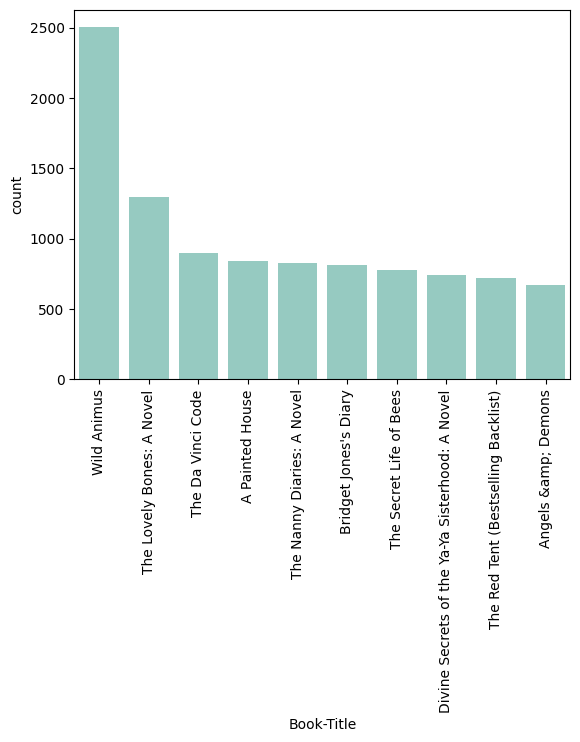

In [20]:
# visualising top 10 books in the dataframe
sns.set_palette('Set3')
sns.countplot(x='Book-Title',data=book_recommend,order=book_recommend['Book-Title'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

In [21]:
book_recommend['Book-Author'].value_counts()
# most popular authors are stephen king, nora roberts, john grisham,
# james patterson and mary higgins clark

Book-Author
Stephen King             10053
Nora Roberts              8429
John Grisham              6010
James Patterson           5845
Mary Higgins Clark        4777
                         ...  
Chris Prosise                1
Kristie Leigh Maguire        1
Kristie Trabant              1
Kristie. Trabant             1
Joseph E Persico             1
Name: count, Length: 101587, dtype: int64

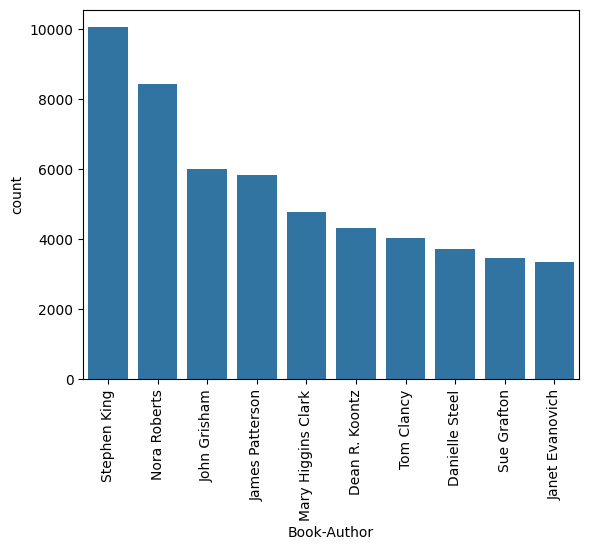

In [9]:
# visualising top 10 authors in the dataframe
sns.countplot(x='Book-Author',data=book_recommend,order=book_recommend['Book-Author'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

In [22]:
book_recommend['Publisher'].value_counts()
# top 5 publishers are Ballantine Books, Pocket, Berkley publishing group,
# Warner books and harlequin

Publisher
Ballantine Books                34724
Pocket                          31989
Berkley Publishing Group        28614
Warner Books                    25506
Harlequin                       25027
                                ...  
Jeffrey Norton Pub                  1
Jenny M Publishers                  1
Jensen, Roy P Inc Remainders        1
Jeppesen Sanderson, Inc.            1
Ã?Â¶bv&amp;hpt                      1
Name: count, Length: 16729, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_9356\2672980562.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Publisher',data=book_recommend,order=book_recommend['Publisher'].value_counts().iloc[:10].index,palette='Set1')


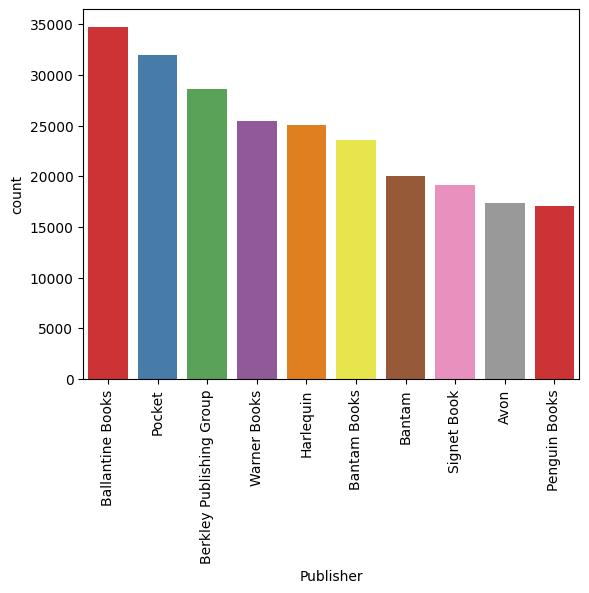

In [18]:
# visualising top 10 publishers in the dataframe

sns.countplot(x='Publisher',data=book_recommend,order=book_recommend['Publisher'].value_counts().iloc[:10].index,palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [23]:
book_recommend['Year-Of-Publication'].value_counts().head(70)
# most read books are from early 90's and 2000's

Year-Of-Publication
2002    87276
2001    75309
1999    70208
2003    69219
2000    67578
        ...  
1977      621
1976      567
1965      528
1953      521
1959      459
Name: count, Length: 70, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_9356\374422755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year-Of-Publication',data=book_recommend,order=book_recommend['Year-Of-Publication'].value_counts().iloc[:10].index,palette='Set2')


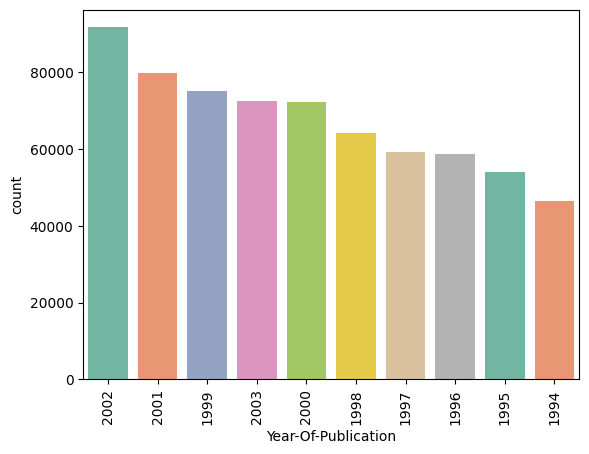

In [19]:
# visualising top 10 years of publication in the dataframe
sns.countplot(x='Year-Of-Publication',data=book_recommend,order=book_recommend['Year-Of-Publication'].value_counts().iloc[:10].index,palette='Set2')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Book-Rating', ylabel='Count'>

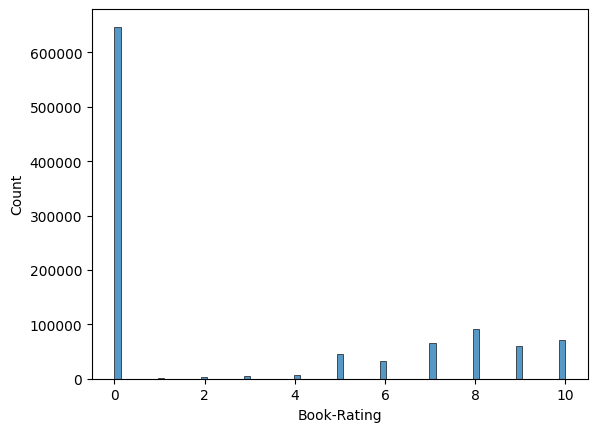

In [24]:
sns.histplot(data=book_recommend['Book-Rating'])
#interestigly most of the books have not been provided with user ratings

# BOOK RECOMMENDATION SYSTEM

In [25]:
# for our recommender system we will consider following conditions to make our system intelligent enough
# to recommend most popular books to our users:-
# 1. considering those books which have been given at least 50 or more number of ratings
#2. users who have given ratings to 200 or more books

In [7]:
#grouping dataset with respect to user id
# and counting where minimum 200 users have rated a book
x=book_recommend.groupby('User-ID').count()['Book-Rating']>200
users_with_rating=x[x].index

In [8]:
# filtering the above data from dataframe book_recommend where it satisfy above condition
filtered_rating=book_recommend[book_recommend['User-ID'].isin(users_with_rating)]

In [9]:
filtered_rating

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,177458,0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,110912,10
...,...,...,...,...,...,...,...,...,...,...
1031124,0231128444,Slow Food(The Case For Taste),Carlo Petrini,2003,Columbia University Press,http://images.amazon.com/images/P/0231128444.0...,http://images.amazon.com/images/P/0231128444.0...,http://images.amazon.com/images/P/0231128444.0...,275970,0
1031125,0520242335,Strong Democracy : Participatory Politics for ...,Benjamin R. Barber,2004,University of California Press,http://images.amazon.com/images/P/0520242335.0...,http://images.amazon.com/images/P/0520242335.0...,http://images.amazon.com/images/P/0520242335.0...,275970,0
1031126,0762412119,"Burpee Gardening Cyclopedia: A Concise, Up to ...",Allan Armitage,2002,Running Press Book Publishers,http://images.amazon.com/images/P/0762412119.0...,http://images.amazon.com/images/P/0762412119.0...,http://images.amazon.com/images/P/0762412119.0...,275970,0
1031127,1582380805,Tropical Rainforests: 230 Species in Full Colo...,"Allen M., Ph.D. Young",2001,Golden Guides from St. Martin's Press,http://images.amazon.com/images/P/1582380805.0...,http://images.amazon.com/images/P/1582380805.0...,http://images.amazon.com/images/P/1582380805.0...,275970,0


In [10]:
#again filtering the new dataset filtered_rating 
# where minimum 50 ratings are provided to the book title
y= filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
popular=y[y].index

C:\Users\HP\AppData\Local\Temp\ipykernel_8884\3415136580.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y= filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50


In [11]:
popular

CategoricalIndex(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
                  'A Bend in the Road', 'A Case of Need',
                  'A Child Called \It\": One Child's Courage to Survive"',
                  'A Civil Action', 'A Day Late and a Dollar Short',
                  'A Fine Balance',
                  ...
                  'Winter Solstice', 'Wish You Well', 'Without Remorse',
                  'Wizard and Glass (The Dark Tower, Book 4)',
                  'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
                  'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
                  'Zoya', '\O\" Is for Outlaw"'],
                 categories=[' A Light in the Storm: The Civil War Diary of..., ' Always Have Popsicles', ' Apple Magic (The Collector's series)', ' Ask Lily (Young Women of Faith: Lily Series,..., ..., 'Ã?Â?rger mit Produkt X. Roman.', 'Ã?Â?sterlich leben.', 'Ã?Â?stlich der Berge.', 'Ã?Â?thique en toc'], ordere

In [12]:
# filtering filtered_rating dataset to get our final dataframe
final_ratings=filtered_rating[filtered_rating['Book-Title'].isin(popular)]

In [13]:
final_ratings

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,0
39,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113519,0
...,...,...,...,...,...,...,...,...,...,...
1028414,1878702831,Echoes,Nancy Morse,1992,Meteor Publishing Corporation,http://images.amazon.com/images/P/1878702831.0...,http://images.amazon.com/images/P/1878702831.0...,http://images.amazon.com/images/P/1878702831.0...,238781,0
1028600,0394429869,I Know Why the Caged Bird Sings,Maya Angelou,1996,Random House,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,239594,8
1028602,0449001164,The Promise,CHAIM POTOK,1997,Ballantine Books,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,239594,7
1028815,0743527631,The Pillars of the Earth,Ken Follett,2002,Encore,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,240144,0


In [14]:
#checking for duplicates in final_ratings
final_ratings.duplicated().sum()

0

In [15]:
# now to approach further, lets make a pivot table between book titile and users
# with respect to book rating , to see which user has given how much rating to which book
pivot = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pivot

C:\Users\HP\AppData\Local\Temp\ipykernel_8884\2204202000.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')


User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [16]:
# replacing nan values in pivot table
pivot.fillna(0,inplace=True)

In [17]:
pivot

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# we will find suitable books to recommend to our users by measuring the cosine similarity 
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
similar=cosine_similarity(pivot)
similar

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [25]:
# after finding cosine similarity, our task is to find top 5 similar books related to the given input book title
# for that, we will define a function passing the input book title and finding its index from the pivot table
# and then finding top 5 similar books from the cosine similarity array.
def recommend (book_name):
    index=np.where(pivot.index==book_name)[0][0]
    similar_books=sorted(list(enumerate(similar[index])),key=lambda x:x[1],reverse=True)[1:6]#fetching books with index 1 to 6 
                                                                                         #since index 0 in the sorted list is input book itself
    for i in similar_books:
        print(pivot.index[i[0]])
    

In [26]:
# testing our recommender system
recommend('Zoya')

Fine Things
Secrets
Kaleidoscope
Exclusive
Five Days in Paris


In [27]:
recommend('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel
